In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1112)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.899997261285


In [28]:
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/vary thickness/generated2.pkl')

new_X = new_df[:]

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred
new_X['total_thickness'] = new_X['thickness_HTL1'] + new_X['thickness_EML'] + new_X['thickness_ETL2']
new_X = new_X.loc[new_X['total_thickness'] <= 80]

triplet3 = new_X[['thickness_HTL1', 'thickness_ETL2', 'thickness_EML', 'cd/a']]
triplet3 = triplet3.loc[triplet3['thickness_EML'] == 35]
triplet3.describe()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,thickness_HTL1,thickness_ETL2,thickness_EML,cd/a
count,540.000000,540.000000,540.0,540.000000
mean,16.666667,16.666667,35.0,24.447648
std,9.869275,9.869275,0.0,4.184786
min,5.000000,5.000000,35.0,20.950000
25%,10.000000,10.000000,35.0,22.300000
50%,15.000000,15.000000,35.0,23.040000
75%,25.000000,25.000000,35.0,25.057500
max,40.000000,40.000000,35.0,46.130000


In [29]:
# triplet3.head()

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

In [30]:
HTL = {'total': triplet3['cd/a'], '50': device50['cd/a'], '45': device45['cd/a'] , '40': device40['cd/a'] , '35': device35['cd/a'] , 
       '30': device30['cd/a'] , '25': device25['cd/a'], '15': device20['cd/a'], '10': device10['cd/a']
      , '0': device['cd/a']}
sequence = ['total', '50', '45', '40', '35', '30', '25', '15', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

df.describe()

,total,50,45,40,35,30,25,15,10,0
count,540.000000,0.0,5.00000,10.000000,0.0,30.000000,100.000000,395.000000,0.0,0.0
mean,24.447648,NaN,45.78600,44.138000,NaN,31.932333,25.563400,22.828127,NaN,NaN
std,4.184786,NaN,0.24552,0.313362,NaN,1.008282,0.407969,1.004131,NaN,NaN
min,20.950000,NaN,45.49000,43.720000,NaN,30.520000,25.000000,20.950000,NaN,NaN
25%,22.300000,NaN,45.65000,43.890000,NaN,31.080000,25.290000,22.140000,NaN,NaN
50%,23.040000,NaN,45.75000,44.190000,NaN,31.550000,25.410000,22.730000,NaN,NaN
75%,25.057500,NaN,45.91000,44.360000,NaN,32.937500,25.710000,23.460000,NaN,NaN
max,46.130000,NaN,46.13000,44.530000,NaN,33.870000,26.520000,24.950000,NaN,NaN


,50,45,40,35,30,25,15,10,0
count,0.0,5.0,10.000000,0.0,30.000000,100.000000,395.000000,0.0,0.0
mean,NaN,5.0,7.500000,NaN,6.666667,21.400000,16.607595,NaN,NaN
std,NaN,0.0,2.635231,NaN,2.397317,9.976741,9.512772,NaN,NaN
min,NaN,5.0,5.000000,NaN,5.000000,5.000000,5.000000,NaN,NaN
25%,NaN,5.0,5.000000,NaN,5.000000,15.000000,10.000000,NaN,NaN
50%,NaN,5.0,7.500000,NaN,5.000000,22.500000,15.000000,NaN,NaN
75%,NaN,5.0,10.000000,NaN,10.000000,30.000000,25.000000,NaN,NaN
max,NaN,5.0,10.000000,NaN,10.000000,40.000000,40.000000,NaN,NaN


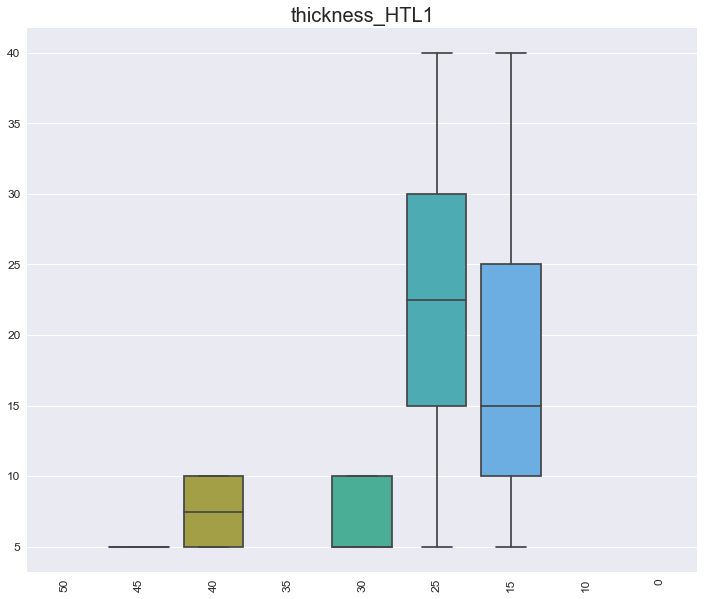

In [31]:
def layer(name): 
    column = name
    HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
           '30': device30[column] , '25': device25[column], '15': device20[column], '10': device10[column], 
           '0': device[column]}
    sequence = ['50', '45', '40', '35', '30', '25', '15', '10', '0']
    df = pd.DataFrame(data=HTL).reindex(columns=sequence)

    # boxplot
    f, ax = plt.subplots(figsize=(12, 10))
    fig = sns.boxplot(data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(name, fontsize=20);
    return df.describe()

layer('thickness_HTL1')

,50,45,40,35,30,25,15,10,0
count,0.0,5.0,10.0,0.0,30.000000,100.00000,395.000000,0.0,0.0
mean,NaN,40.0,35.0,NaN,36.666667,12.30000,15.493671,NaN,NaN
std,NaN,0.0,0.0,NaN,2.397317,6.94204,8.282563,NaN,NaN
min,NaN,40.0,35.0,NaN,35.000000,5.00000,5.000000,NaN,NaN
25%,NaN,40.0,35.0,NaN,35.000000,5.00000,10.000000,NaN,NaN
50%,NaN,40.0,35.0,NaN,35.000000,10.00000,15.000000,NaN,NaN
75%,NaN,40.0,35.0,NaN,40.000000,15.00000,22.500000,NaN,NaN
max,NaN,40.0,35.0,NaN,40.000000,30.00000,30.000000,NaN,NaN


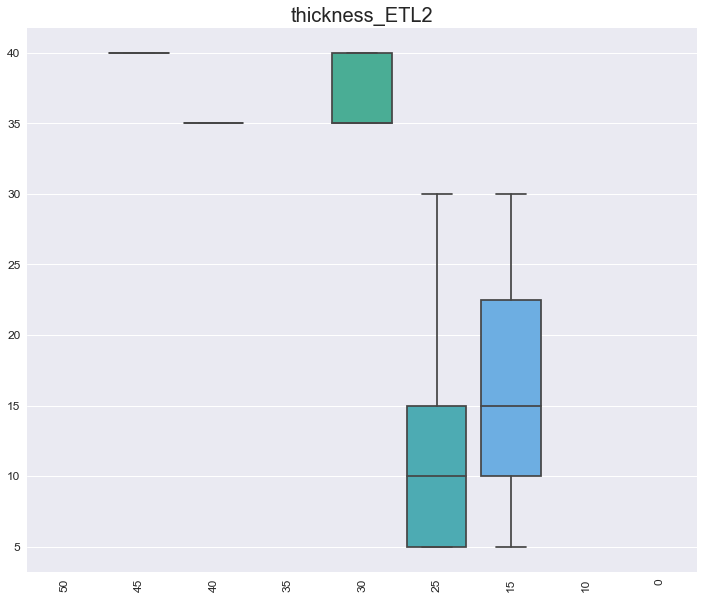

In [32]:
layer('thickness_ETL2')

,50,45,40,35,30,25,15,10,0
count,0.0,566.000000,259.000000,6.000000,1632.000000,864.000000,6348.000000,0.0,0.0
mean,NaN,13.745583,17.741313,27.500000,14.947917,27.337963,21.651701,NaN,NaN
std,NaN,8.684170,10.566084,2.738613,9.508800,13.536240,13.232817,NaN,NaN
min,NaN,5.000000,5.000000,25.000000,5.000000,5.000000,5.000000,NaN,NaN
25%,NaN,5.000000,10.000000,25.000000,5.000000,15.000000,10.000000,NaN,NaN
50%,NaN,10.000000,15.000000,27.500000,15.000000,30.000000,20.000000,NaN,NaN
75%,NaN,20.000000,25.000000,30.000000,20.000000,35.000000,30.000000,NaN,NaN
max,NaN,40.000000,45.000000,30.000000,45.000000,50.000000,50.000000,NaN,NaN


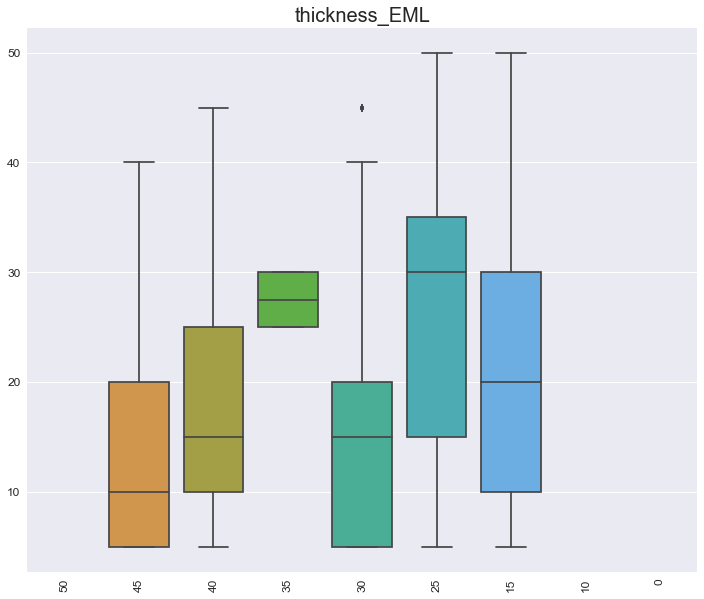

In [17]:
layer('thickness_EML')

In [6]:
triplet3.to_csv('C:/Anaconda3/projects/oled/vary thickness/less80.csv', header=triplet3.columns, 
             index=None, sep=',')

In [31]:
device.describe()

,thickness_HTL1,thickness_EML,thickness_ETL2,cd/a
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN
